In [26]:
import numpy as np
import matplotlib.pyplot as plt

import os 

from tqdm import tqdm_notebook

import cv2

In [97]:
path = "../data/stage_1_fixes/stage1_train/"
names = os.listdir(path)

In [98]:
def mirror(im, mask):
    shape = im.shape
    h = lambda arr: np.hstack((arr[:,(shape[1] // 2)::-1], arr, arr[:,:(shape[1] // 2):-1]))
    v = lambda arr: np.vstack((arr[shape[0] // 2::-1,:], arr, arr[:shape[0] // 2:-1,:]))

    return v(h(im)), v(h(mask))

In [99]:
len(names)

664

In [100]:
train_names = names[:620]
val_names = names[620:]

In [101]:
name = names[0]

In [102]:
DEFAULT_VERTICAL = 512

In [103]:
def process_data(names, prefix = '', use_padding = False, resize = False, store = False):
    im_w_mask_list = []
    
    for name in tqdm_notebook(names):
        im = plt.imread(path + name + "/images/" + name + ".png")[:,:,:3]

        resize_ratio = DEFAULT_VERTICAL / im.shape[0]

        masks_path = path + name + "/masks/"
        masks_names = os.listdir(masks_path)

        mask = np.zeros_like(im[:,:,0])
        for m_name in masks_names:
            mask += plt.imread(masks_path + m_name)

        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        
        if resize:
            im = cv2.resize(im, (DEFAULT_VERTICAL, int(im.shape[1] * resize_ratio)))
            mask = cv2.resize(mask, (DEFAULT_VERTICAL, int(mask.shape[1] * resize_ratio)))
        
        if use_padding:
            im,mask = mirror(im, mask)
        
        boarder = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, np.ones((2,2)))
        im_w_mask = (np.stack((im, mask, boarder), 2))
        
        
        #print(im_w_mask.shape)
        np.save("../data/ext_data_processed/" + prefix + "/" + prefix + "_" + name, im_w_mask)
        
        if store:
            im_w_mask_list.append(im_w_mask)
        #masks.append(mask)
        
    
    return im_w_mask_list


In [104]:
im_w_mask_list = process_data(train_names[:], prefix='train')#, store=True)

A Jupyter Widget

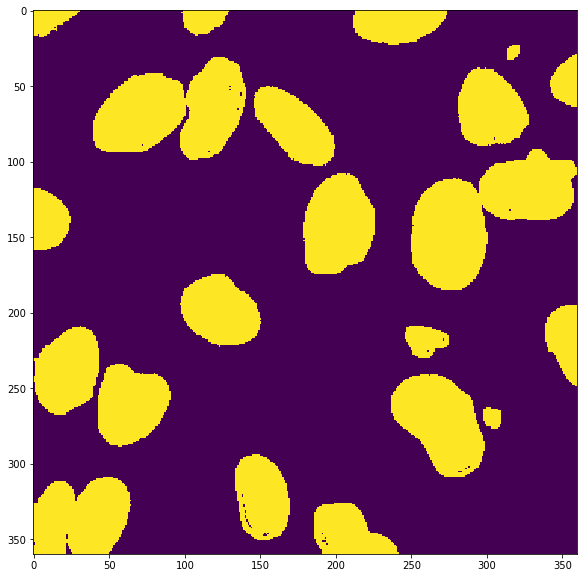

In [41]:
plt.figure(figsize = (10,10))
plt.imshow(np.load("../data/stage_1_processed/train/train_0532c64c2fd0c4d3188cc751cdfd566b1cfba3d269358717295bab1504c7c275.npy")[:,:,1])
plt.show()

In [22]:
test_data = np.load("../data/stage_1_processed/val/val_08151b19806eebd58e5acec7e138dbfbb1761f41a1ab9620466584ecc7d5fada.npy")

In [24]:
test_data[:,:,0]

array([[ 6,  6,  6, ..., 24, 23, 24],
       [ 5,  6,  6, ..., 24, 23, 23],
       [ 6,  7,  7, ..., 23, 22, 23],
       ...,
       [32, 35, 32, ...,  6,  7,  7],
       [34, 35, 33, ...,  6,  6,  7],
       [35, 36, 34, ...,  7,  7,  7]], dtype=uint8)

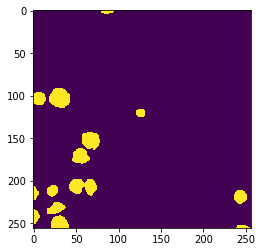

In [17]:
plt.imshow(im_w_mask_list[0][:,:, 1])
plt.show()

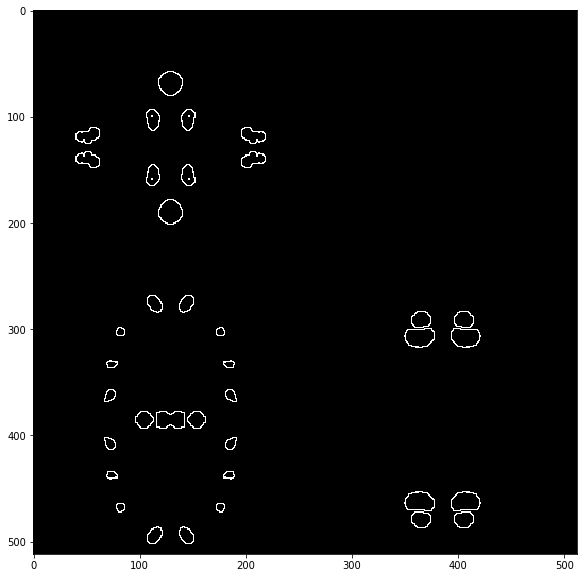

In [110]:
#plt.imshow(train_ims[1], cmap='gray')
#plt.show()
plt.figure(figsize=(10,10))
im = cv2.morphologyEx(train_masks[1], cv2.MORPH_GRADIENT, np.ones((2,2)))
plt.imshow(im, cmap='gray')
plt.show()

In [35]:
del train_masks

In [ ]:
min_horizontal = min([x.shape[1] for x in train_ims])
min_horizontal

In [ ]:
train_ims = [x[:,]]

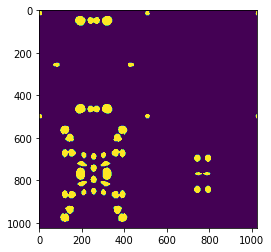

In [123]:
plt.imshow(miror(mask,mask)[0])
plt.show()

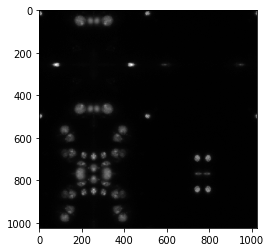

In [124]:
plt.imshow(miror(im,mask)[0], cmap='gray')
plt.show()

## 

In [5]:
shapes = np.zeros((670,3))

for i in range(len(names)):
    im = plt.imread(path + names[i] + "/images/" + names[i] + ".png")
    shapes[i] = im.shape

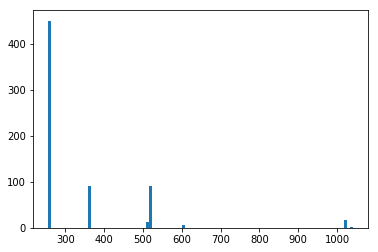

In [6]:
plt.hist(shapes[:,0], bins = 100)
plt.show()

In [22]:
set(shapes[:,0])

{256.0, 260.0, 360.0, 512.0, 520.0, 603.0, 1024.0, 1040.0}

In [19]:
set(shapes[:,1])

{256.0, 320.0, 347.0, 360.0, 640.0, 696.0, 1024.0, 1272.0, 1388.0}

In [38]:
np.where(shapes[:,0] == 1024)

(array([  3,  84,  96, 116, 119, 130, 209, 379, 386, 396, 415, 507, 515,
        617, 666, 667]),)

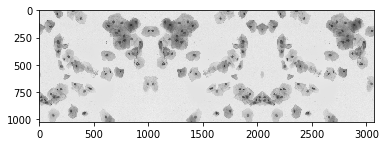

In [39]:
n = 3
im = plt.imread(path + names[n] + "/images/" + names[n] + ".png")
plt.imshow(np.hstack((im[:,::-1,:], im, im[:,::-1,:])))
plt.show()

In [40]:
im.shape

(1024, 1024, 4)

In [13]:
def random_select(im, mask, shape = (256, 256)):
    x = np.random.randint(0, im.shape[0] - shape[0])
    y = np.random.randint(0, im.shape[1] - shape[1])
    
    excerpt_x = slice(x, x+shape[0])
    excerpt_y = slice(y, y+shape[1])
    
    return im[excerpt_x, excerpt_y, :], mask[excerpt_x, excerpt_y, :]

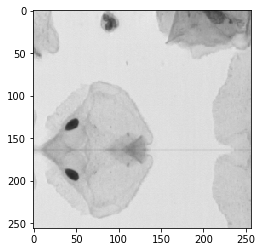

In [14]:

plt.imshow(random_select(miror(im, im)[0], miror(im, im)[0])[0])
plt.show()

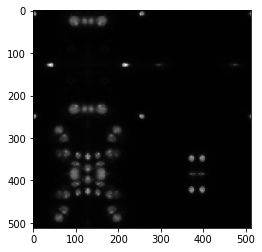

In [24]:
im = train_ims[0]
plt.imshow(im, cmap='gray')
plt.show()

In [15]:
import Augmentor as au

In [17]:
p = au.Pipeline()#.(miror(im, im)[0])

p.rotate(1, 25, 25)
p.flip_random(1)
p.random_distortion(1, 10,10,8)
p.skew(1)
p.

In [33]:
np.expand_dims(np.expand_dims(im, 0),3).shape

(1, 512, 512, 1)

In [79]:
im_w_mask = np.stack((train_ims[0], train_masks[0]), 2)
g = p.keras_generator_from_array((np.expand_dims(im_w_mask, 0)*255).astype('uint8'),np.ones(1), 1, )

In [78]:
#gens = [p.keras_generator_from_array(np.expand_dims(im, 0)*255).astype('uint8'),np.ones(1), for im in train_ims]

SyntaxError: invalid syntax (<ipython-input-78-5394cedf5a4b>, line 1)

In [ ]:
cv2.

In [90]:
n = next(g)

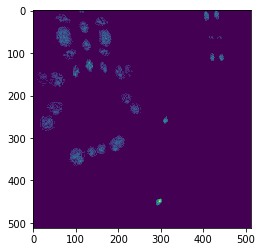

In [91]:
#augm_im = next(g)[0]
plt.imshow(n[0][0][:,:,0])
plt.show()

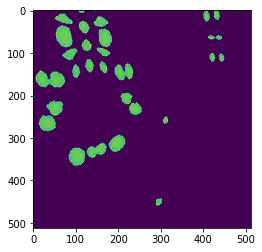

In [92]:
plt.imshow(n[0][0][:,:,1])
plt.show()

In [135]:
augm_im.shape

(1, 3072, 3072, 4)

In [77]:
np.expand_dims(miror(im, im)[0], 0).shape

(1, 3072, 3072, 4)

## ANSW

In [1]:
from skimage.morphology import label # label regions
def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def prob_to_rles(x, cut_off = 0.5):
    lab_img = label(x>cut_off)
    if lab_img.max()<1:
        lab_img[0,0] = 1 # ensure at least one prediction per image
    for i in range(1, lab_img.max()+1):
        yield rle_encoding(lab_img==i)

In [7]:
a = np.zeros((4,4))
a[0,1],a[1,1], a[1,2], a[2,1] = 1,1,1,1
a

array([[0., 1., 0., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.]])

In [8]:
rle_encoding(a)

[5, 3, 10, 1]

In [17]:
b = np.vstack((a,a))

In [10]:
[x for x in prob_to_rles(np.vstack((a,a)))]

[[9, 3, 18, 1], [13, 3, 22, 1]]